## Çaprazlamalar

*Çaprazlamanın birden fazla tanımı olabilir :  Veri seti içersinideki değişkenlerin birlikte değerlendirilmesi, kırılımların göz önünde bulundurulması,değişkenlerin birlikte göz önünde bulundurulması...*<br>

In [1]:
import seaborn as sns
from pandas.api.types import CategoricalDtype
diamonds = sns.load_dataset("diamonds")
df = diamonds.copy()
cut_categories = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
df.cut = df.cut.astype(CategoricalDtype(categories = cut_categories, ordered = True))
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


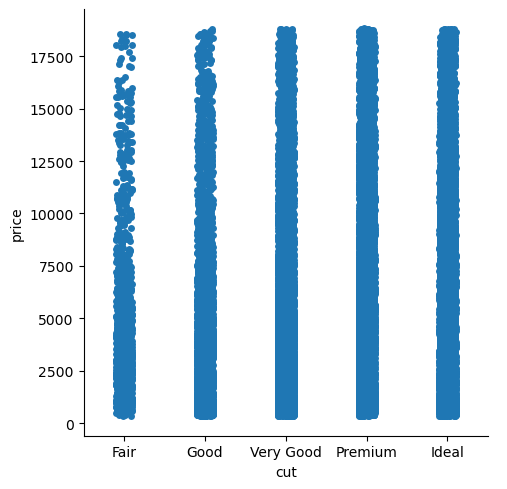

In [2]:
sns.catplot(x = "cut", y = "price", data = df);

*Yukarıdaki grafikte; Her price sürekli değişkeninin üst fiyatlarında bir üst kategori sınıfına geçildikçe yoğunlaşmaların arttığını görebiliriz.Yani kalite arttıkça daha yüksek fiyatlarda bulunan elmas miktarı da artıyor diyebiliriz.*

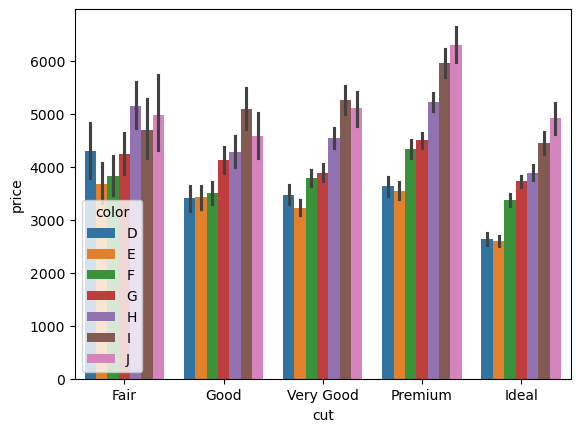

In [3]:
sns.barplot(x = "cut", y = "price", hue = "color", data = df);

*Bir önceki grafikte ideal sınıfına ait barın her fiyatlandırma bölgesinde istikrarlı bir yoğunluğa sahip olduğunu görmüştük. Yukarıdaki grafikten aynı sınıfa ait elmas fiyatlarının istikrarlığını D ve E sınıfı renklerin aşağıya çektiğini; J ve I sınıfı renklerin ise yukarıya taşıdığı sonucunu çıkarabiliriz.*

*Yukarıdaki grafik aslında bir groupby işleminin sonucunu temsil ediyor. Yani yukarıdaki çubuklar; Elmas fiyatlarının ortalamasının kalite ve renk kırılımındaki değerlerini temsil ediyor.Bunu aşağıdaki kod satırı ile doğrulayabiliriz:*

In [6]:
df.groupby(["cut", "color"], observed = True)["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337